In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import gudhi as gd
from open3d import io, visualization


In [3]:

# from hauss import hausd_interval
from open3d import geometry, utility

# Path
pathToData = os.path.join(os.getcwd(), 'data', 'bags', 'bag_1')

# Read Data
pointCloud = io.read_point_cloud(os.path.join(pathToData, 'cloud_final.ply')) # Read point cloud
print(pointCloud)
pointCloudArray = np.asarray(pointCloud.points)
print(len(pointCloudArray))

# Subsample original point set
sparsePointCloudArray = gd.subsampling.sparsify_point_set(points=pointCloudArray, min_squared_dist=0.0001)
print(len(sparsePointCloudArray))

pcd = geometry.PointCloud()
pcd.points = utility.Vector3dVector(sparsePointCloudArray)
visualization.draw_geometries([pcd])


# # Path
# pathToData = os.path.join(os.getcwd(), 'data', 'bags', 'bag_0')

# # Read Data
# pointCloud = io.read_point_cloud(os.path.join(pathToData, 'cloud_final.ply')) # Read point cloud
# print(pointCloud)
# pointCloudArray = np.asarray(pointCloud.points)

# # Visualize point cloud
# visualize = True
# if visualize:
#     visualization.draw_geometries([pointCloud])

# # Create alpha complex
alphaComplex = gd.AlphaComplex(points = pointCloudArray)

# # Create simplex tree object
simplexTree = alphaComplex.create_simplex_tree()

# Create persistence diagram
persistenceDiagram = simplexTree.persistence()



PointCloud with 332005 points.
332005
48487


C:\Users\spier\AppData\Local\Programs\Python\Python310\lib\site-packages\gudhi\persistence_graphical_tools.py:85: UserWarning: There are 1390913 intervals given as input, whereas max_intervals is set to 1000000.
  warnings.warn(


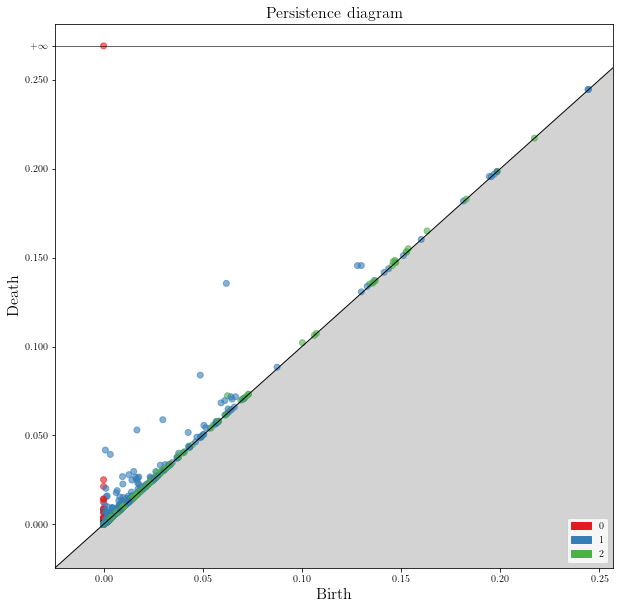

In [4]:
import matplotlib


gd.plot_persistence_diagram(persistenceDiagram, legend=True)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [111]:
# print(list(simplexTree.get_filtration()))
# persistenceDiagram

import math

lastConnection = None

for p in persistenceDiagram:
    if p[0] != 0 or math.isinf(p[1][1]):
        continue
    print(p)
    lastConnection = p[1][1]
    break

connectionPoints = None

for splx in simplexTree.get_filtration() :
    if splx[1] == 0: continue
    if splx[1] != lastConnection: continue 
    connectionPoints = splx[0]
    print(splx)



(0, (0.0, 0.05510144263334403))
([181801, 189856], 0.05510144263334403)


In [114]:
import networkx as nx
import random
import numpy as np

print(connectionPoints)
print(lastConnection)

c = simplexTree.copy()
c.prune_above_filtration(0.0001)


points = []

for sk_value in c.get_skeleton(1):

    i = sk_value[0][0]
    
    while len(points) != i+1:
        points.append([])
    if sk_value[1] == 0: continue

    v = sk_value[0][1]

    points[i].append(v)

print(len(points))


for i in range(len(points)-1, 0, -1):
    for j in points[i]:
        points[j].append(i)
    points[i].insert(0, i)


with open("points.txt",'r+') as file:
    file.truncate(0)

f = open("points.txt", "a")  # append mode

for p in points:
    for d in p:
        f.write(f"{d} ")
    f.write("\n")
f.close()


def random_color_generator():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)


graph = nx.read_adjlist("points.txt", nodetype=int)
subgraphs = nx.connected_components(graph)


clouds = []

for sg in subgraphs:

    segmentedCloud = [pointCloudArray[i] for i in sg]

    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(segmentedCloud)
    pcd.paint_uniform_color(random_color_generator())

    clouds.append(pcd)

visualization.draw_geometries(clouds)


[181801, 189856]
0.05510144263334403
338591


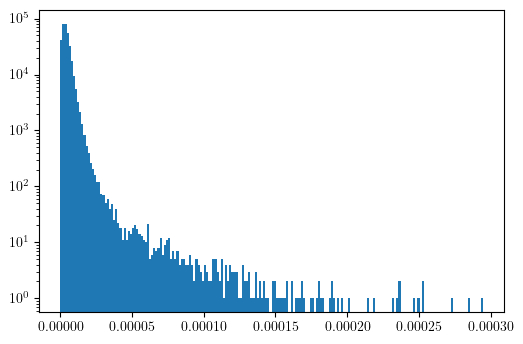

In [22]:
import matplotlib.pyplot as plt

d = [p[1][1] for i,p in enumerate(persistenceDiagram) if p[0] == 0 and p[1][1] < 1000 and p[1][1] < 0.0003]

plt.figure(dpi=100)
plt.hist(d, bins=200)
plt.yscale('log')




In [38]:
print(np.mean(d))
print(np.var(d))
print(np.quantile(d, 0.999), np.round(np.quantile(d, 0.999), 6))
print(0.00005)

4.479092879963857e-06
2.2621792311023234e-11
5.60881964694324e-05 5.6e-05
5e-05
